# Lista 3- Dissecação placa, carregamento triangular

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sympy as smp
import fourierdouble as fd
from sympy.plotting import plot3d


### É definido as variaveis de modo simbólico

In [2]:
x,y,a,b,p,wm,v,d,E,h,t=smp.symbols('x y a b p wm v d E h t')
m,n,i,j=smp.symbols('m n i j', int=True)


### A amplitude do carregamento de fourier em duplo seno foi cálculado manualmente
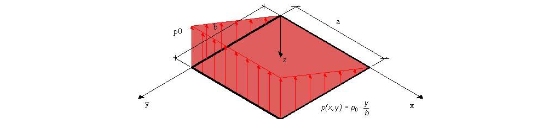

In [3]:
k=fd.sfourier_value(10*x**2/10**2 ,15,10,10,10)
fmn=k[0]


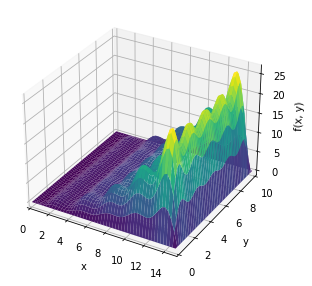

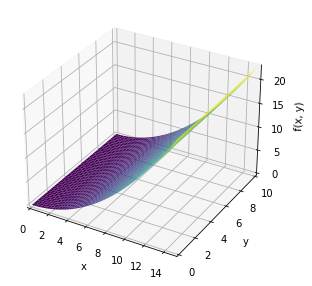

0.901536913130517


In [4]:
fourier=fd.sfourier_doublesin(10*x**2/10**2  ,15,10,10,10)

#### É atribuidos valores para as propriedade e dimensões da placa. A amplitude do deslocamento da placa foi obtido pela solução de navier devido as condições de contorno bi apoiadas
<br>

$\Large wmn=\frac{fmn}{d\pi^4((\frac{m^2}{a^2})+\frac{n^2}{b^2})^2)}$

#### dessa forma o deslocamento é dado:
<br>

$\Large w(x,y)=\Sigma\Sigma wmn\sin{\frac{n\pi y}{b}}\sin{\frac{m\pi x}{a}}$

In [5]:
E=25000000
h=0.3
v=0.2
d=E*h**3/(12*(1-v**2))
wmn=fmn/(d*smp.pi**4*((m**2/a**2)+(n**2/b**2))**2)
freq=smp.sin(x*smp.pi*m/a)*smp.sin(y*smp.pi*n/b)
W=smp.summation((smp.summation(wmn*freq,(n,1,10))),(m,1,10))
W=W.subs([(a,15),(b,10),(p,10)])


#### Com as deformações é calculada os momentos, curvaturas, cortantes, deformações e tensões

In [6]:
dwdx2=smp.diff((smp.diff(W,x)),x)
dwdy2=smp.diff((smp.diff(W,y)),y)
mx=(dwdx2+v*dwdy2)*d
my=(dwdy2+v*dwdx2)*d
mxy=-(1-v)*d*smp.diff((smp.diff(W,y)),x)

In [7]:
dwdx3=smp.diff(smp.diff((smp.diff(W,x)),x),x)
dwdy3=smp.diff(smp.diff((smp.diff(W,y)),y),y)
dwx2y=smp.diff(smp.diff((smp.diff(W,x)),x),y)
dwxy2=smp.diff(smp.diff((smp.diff(W,x)),y),y)
vx=-d*(dwdx3+(2-v)*dwxy2)
vy=-d*(dwdy3+(2-v)*dwx2y)
dx=-h/2*dwdx2
dy=-h/2*dwdy2
gama=-h*(smp.diff((smp.diff(W,x)),y))
sigmax=E/(1-v)*(dx+v*dy)
sigmay=E/(1-v)*(v*dx+dy)
tal=E/2/(1-v)*gama

In [8]:
WW=smp.lambdify([x,y],W)
Mx=smp.lambdify([x,y],mx)
Mxy=smp.lambdify([x,y],mxy)
My=smp.lambdify([x,y],my)
Vx=smp.lambdify([x,y],vx)
Vy=smp.lambdify([x,y],vy)
kx=smp.lambdify([x,y],dwdx2)
ky=smp.lambdify([x,y],dwdy2)
εx=smp.lambdify([x,y],dx)
εy=smp.lambdify([x,y],dy)
γ=smp.lambdify([x,y],gama)
σx=smp.lambdify([x,y],sigmax)
σy=smp.lambdify([x,y],sigmay)
τxy=smp.lambdify([x,y],tal)
WW(10,5)

0.009465573989217619

In [9]:
m1 = np.linspace(0,15,200)
m2 = np.linspace(0,10,200)
x1,y1=np.meshgrid(m1,m2)

<a list of 10 text.Text objects>

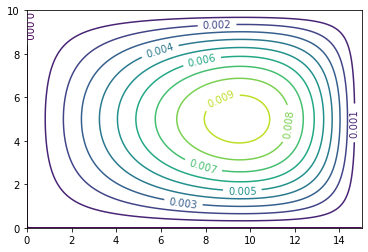

In [10]:
cont=plt.contour(x1,y1,WW(x1,y1),levels=10)
plt.clabel(cont)

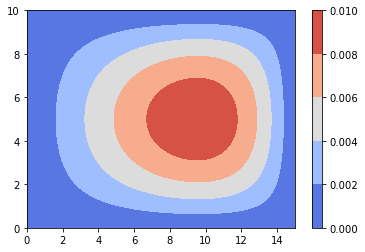

In [11]:
plt.contourf(x1,y1,WW(x1,y1),levels=5,cmap='coolwarm')
plt.colorbar()

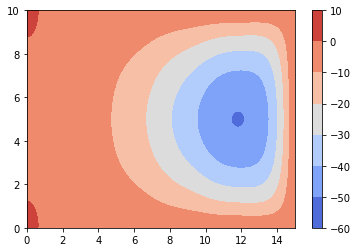

In [12]:
plt.contourf(x1,y1,Mx(x1,y1),levels=5,cmap='coolwarm')
plt.colorbar()

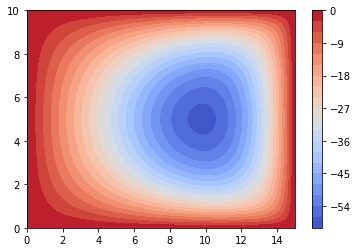

In [13]:
plt.contourf(x1,y1,My(x1,y1),levels=20, cmap='coolwarm')
plt.colorbar()

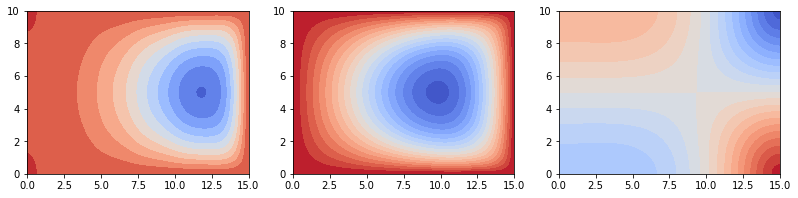

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(13.5,3))
ax = axes[0]
ax.contourf(x1,y1,Mx(x1,y1),levels=10,cmap='coolwarm')
ax1= axes[1]
ax1.contourf(x1,y1,My(x1,y1),levels=20, cmap='coolwarm')
ax2= axes[2]
ax2.contourf(x1,y1,Mxy(x1,y1),levels=20, cmap='coolwarm')

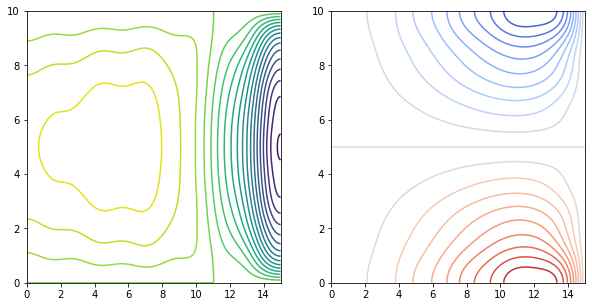

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
ax = axes[0]
ax.contour(x1,y1,Vx(x1,y1),levels=20,)
ax1= axes[1]
ax1.contour(x1,y1,Vy(x1,y1),levels=20, cmap='coolwarm')
#cortantes em x e y

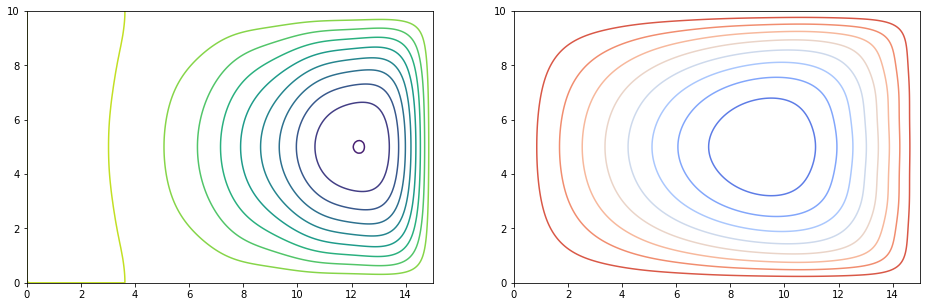

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(16,5))
ax = axes[0]
ax.contour(x1,y1,kx(x1,y1),levels=10,)
ax1= axes[1]
ax1.contour(x1,y1,ky(x1,y1),levels=10, cmap='coolwarm')
#curvaturas

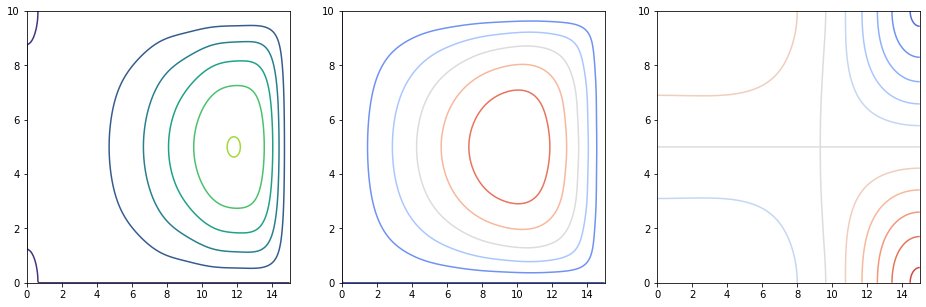

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))
ax = axes[0]
ax.contour(x1,y1,σx(x1,y1),levels=5,)
ax1= axes[1]
ax1.contour(x1,y1,σy(x1,y1),levels=5, cmap='coolwarm')
ax2= axes[2]
ax2.contour(x1,y1,τxy(x1,y1),levels=10, cmap='coolwarm')
#tensões

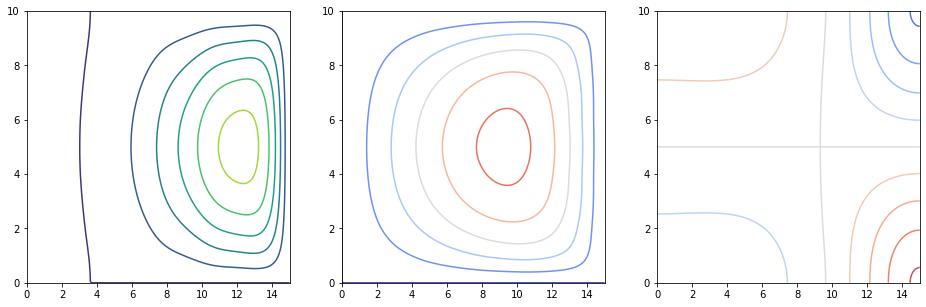

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))
ax = axes[0]
ax.contour(x1,y1,εx(x1,y1),levels=5,)
ax1= axes[1]
ax1.contour(x1,y1,εy(x1,y1),levels=5, cmap='coolwarm')
ax2= axes[2]
ax2.contour(x1,y1,γ(x1,y1),levels=10, cmap='coolwarm')
#deformações)

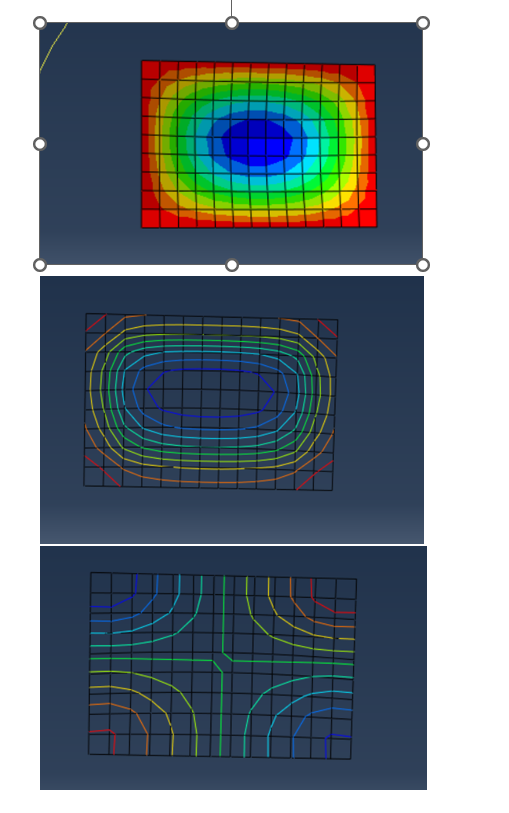

In [19]:
Mx(x1,y1).min()

-50.28793535540349

In [20]:
theta1=1/2*smp.atan(2*mxy/(mx+my))
theta2=theta1+smp.pi/2
#momento normal ao plano
Mtmax=(mx+my)/2+smp.sqrt((mx-my)**2+mxy**2)
Mtmin=(mx+my)/2-smp.sqrt((mx-my)**2+mxy**2)

#momento transversal ao plano
Mnmax=(mx-my)/2+smp.sqrt((mx-my)**2+mxy**2)
Mnmin=(mx-my)/2-smp.sqrt((mx-my)**2+mxy**2)

In [21]:
Mtmax=smp.lambdify([x,y],mx)
Mtmin=smp.lambdify([x,y],mxy)
Mnmax=smp.lambdify([x,y],my)
Mnmin=smp.lambdify([x,y],vx)
T=smp.lambdify([x,y],theta1)
T2=smp.lambdify([x,y],theta2)

In [22]:
def mt_theta(mx,my,mxy,i):
    k=15*i
    t=0+smp.pi/12*i
    mt=(mx+my)/2+(mx-my)/2*smp.cos(2*t)+mxy*smp.sin(2*t)
    Mt=smp.lambdify([x,y],mt)
    plt.contour(x1,y1,Mt(x1,y1),levels=20, cmap='coolwarm')
    plt.colorbar()
    plt.title('Mt para theta %d'%k)
    plt.show()

def mn_theta(mx,my,mxy,i):
    k=15*i
    t=0+smp.pi/12*i
    mt=-(mx-my)/2*smp.sin(2*t)+mxy*smp.cos(2*t)
    Mt=smp.lambdify([x,y],mt)
    plt.contour(x1,y1,Mt(x1,y1),levels=20, cmap='coolwarm')
    plt.colorbar()
    plt.title('Mn para theta %d'%k)
    plt.show()


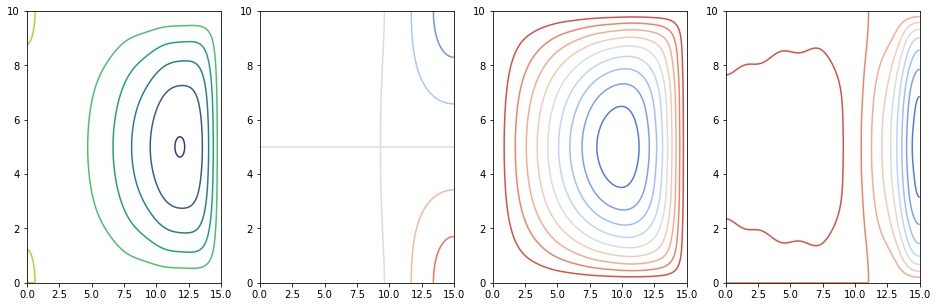

In [23]:
fig, axes = plt.subplots(1, 4, figsize=(16,5))
ax = axes[0]
ax.contour(x1,y1,Mtmax(x1,y1),levels=5,)
ax1= axes[1]
ax1.contour(x1,y1,Mtmin(x1,y1),levels=5, cmap='coolwarm')
ax2= axes[2]
ax2.contour(x1,y1,Mnmax(x1,y1),levels=10, cmap='coolwarm')
ax2= axes[3]
ax2.contour(x1,y1,Mnmin(x1,y1),levels=10, cmap='coolwarm')
#deformações)

In [24]:
def cu(mx,my,mxy,i):
    k=15*i
    t=0+smp.pi/12*i
    mt=-(mx-my)/2*smp.sin(2*t)+mxy*smp.cos(2*t)
    plot3d(mt, (x, 0,15), (y, 0,10))

<lambdifygenerated-19>:2: RuntimeWarning: divide by zero encountered in true_divide
  return -0.5*arctan(0.0426666666666667*((1/15)*pi*((1/10)*pi*(-(10935000000/169)/pi**4 + (16200000/169)*(-675/pi**3 + (675/2)/pi)/pi)*cos((1/10)*pi*y) + (3/10)*pi*(-(145800000/289)/pi**4 + (216000/289)*(-675/pi**3 + (675/2)/pi)/pi)*cos((3/10)*pi*y) + (1/2)*pi*(-(2187000000/52441)/pi**4 + (3240000/52441)*(-675/pi**3 + (675/2)/pi)/pi)*cos((1/2)*pi*y) + (7/10)*pi*(-(437400000/55447)/pi**4 + (648000/55447)*(-675/pi**3 + (675/2)/pi)/pi)*cos((7/10)*pi*y) + (9/10)*pi*(-(1215000000/537289)/pi**4 + (1800000/537289)*(-675/pi**3 + (675/2)/pi)/pi)*cos((9/10)*pi*y))*cos((1/15)*pi*x) + (1/5)*pi*((1/10)*pi*(-200000/pi**4 + 8000*(-25/pi**3 + (225/2)/pi)/pi)*cos((1/10)*pi*y) + (3/10)*pi*(-(5000000/507)/pi**4 + (200000/507)*(-25/pi**3 + (225/2)/pi)/pi)*cos((3/10)*pi*y) + (1/2)*pi*(-(1000000/841)/pi**4 + (40000/841)*(-25/pi**3 + (225/2)/pi)/pi)*cos((1/2)*pi*y) + (7/10)*pi*(-(5000000/19663)/pi**4 + (200000/19663)*(-25/pi*

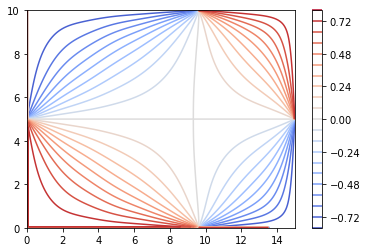

In [25]:
    plt.contour(x1,y1,T(x1,y1),levels=20, cmap='coolwarm')
    plt.colorbar()

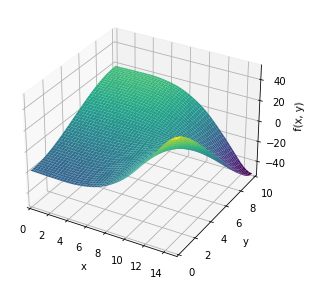

In [26]:
cu(mx,my,mxy,0)

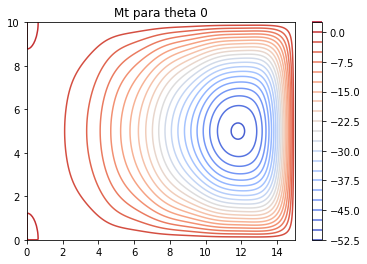

In [27]:
mt_theta(mx,my,mxy,0)


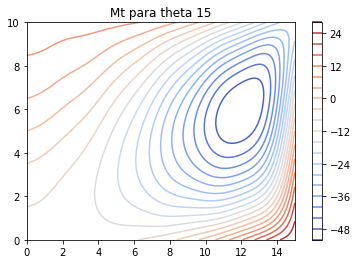

In [28]:
mt_theta(mx,my,mxy,1)


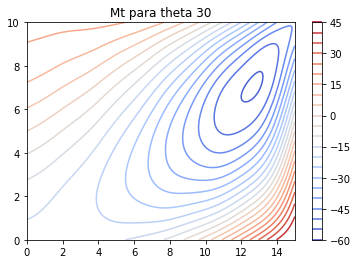

In [29]:
mt_theta(mx,my,mxy,2)

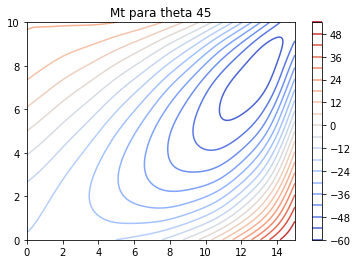

In [30]:
mt_theta(mx,my,mxy,3)

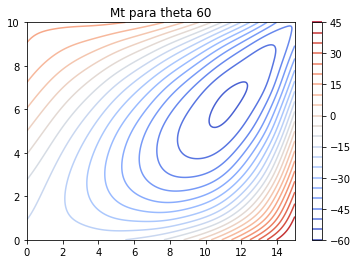

In [31]:
mt_theta(mx,my,mxy,4)

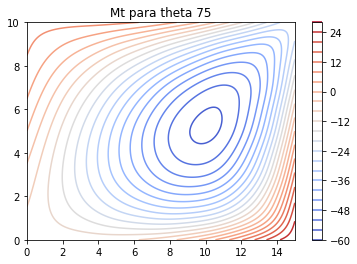

In [32]:
mt_theta(mx,my,mxy,5)

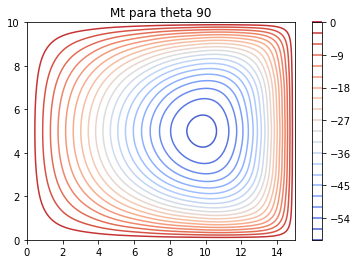

In [33]:
mt_theta(mx,my,mxy,6)

# Momentos Cisalhante em função do angulo

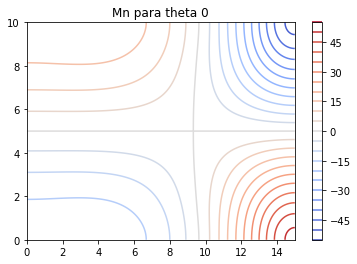

In [34]:
mn_theta(mx,my,mxy,0)

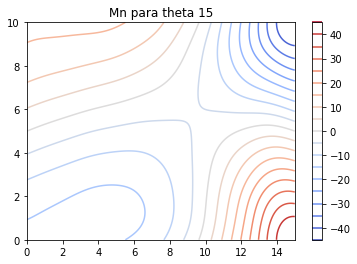

In [35]:
mn_theta(mx,my,mxy,1)

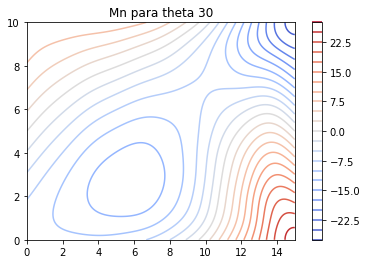

In [36]:
mn_theta(mx,my,mxy,2)

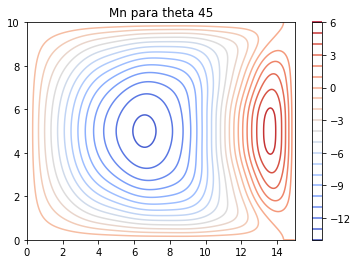

In [37]:
mn_theta(mx,my,mxy,3)

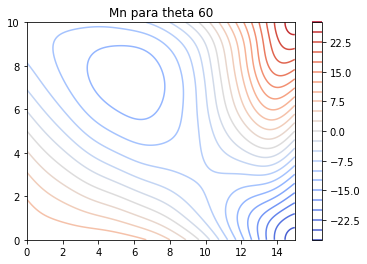

In [38]:
mn_theta(mx,my,mxy,4)

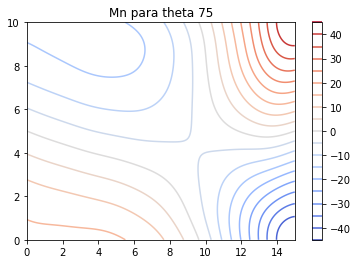

In [39]:
mn_theta(mx,my,mxy,5)

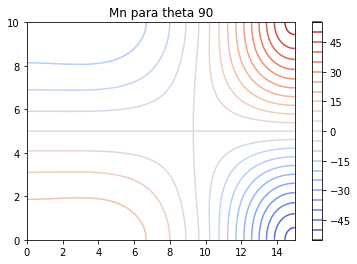

In [40]:
mn_theta(mx,my,mxy,6)

In [41]:
W

4.55111111111111e-7*((810000*(-13500/pi**4 + 20*(-675/pi**3 + 675/(2*pi))/pi)*sin(pi*y/10)/169 + 32400*(-4500/pi**4 + 20*(-675/pi**3 + 675/(2*pi))/(3*pi))*sin(3*pi*y/10)/289 + 810000*(-2700/pi**4 + 4*(-675/pi**3 + 675/(2*pi))/pi)*sin(pi*y/2)/52441 + 32400*(-13500/(7*pi**4) + 20*(-675/pi**3 + 675/(2*pi))/(7*pi))*sin(7*pi*y/10)/7921 + 810000*(-1500/pi**4 + 20*(-675/pi**3 + 675/(2*pi))/(9*pi))*sin(9*pi*y/10)/537289)*sin(pi*x/15) + (400*(-500/pi**4 + 20*(-25/pi**3 + 225/(2*pi))/pi)*sin(pi*y/10) + 10000*(-500/(3*pi**4) + 20*(-25/pi**3 + 225/(2*pi))/(3*pi))*sin(3*pi*y/10)/169 + 10000*(-100/pi**4 + 4*(-25/pi**3 + 225/(2*pi))/pi)*sin(pi*y/2)/841 + 10000*(-500/(7*pi**4) + 20*(-25/pi**3 + 225/(2*pi))/(7*pi))*sin(7*pi*y/10)/2809 + 400*(-500/(9*pi**4) + 20*(-25/pi**3 + 225/(2*pi))/(9*pi))*sin(9*pi*y/10)/289)*sin(pi*x/5) + (810000*(-108/pi**4 + 20*(-27/(5*pi**3) + 135/(2*pi))/pi)*sin(pi*y/10)/11881 + 810000*(-36/pi**4 + 20*(-27/(5*pi**3) + 135/(2*pi))/(3*pi))*sin(3*pi*y/10)/32761 + 1296*(-108/(5*pi